In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.mixture import GaussianMixture as SKLearnGMM
from GaussianMixturePy import GaussianMixturePy

In [3]:
np.random.seed(42)

In [4]:
# 1. Effect of Compression Ratio
def analyze_compression_ratio():
    print("\nAnalyzing the effect of compression ratio...")
    # Fixed parameters
    n_samples = 10000
    n_features = 512
    n_clusters = 3
    compression_ratios = np.linspace(0.01, 1.0, 10)
    
    # Store results
    results = {
        'time_compressed': [],
        'time_full': [],
        'silhouette_compressed': [],
        'silhouette_full': []
    }
    
    # Generate data
    X, true_labels = make_blobs(n_samples=n_samples, n_features=n_features,
                               centers=n_clusters, random_state=42)
    
    # Test each compression ratio
    for ratio in compression_ratios:
        print(f"\nCompression Ratio: {ratio*100:.0f}%")
        
        # Full GMM
        start_time = time.time()
        full_gmm = GaussianMixturePy(
            n_components=n_clusters,
            num_samp=n_samples,
            num_feat_full=n_features,
            num_feat_comp=n_features,  # no compression
            random_state=42
        )
        full_gmm.fit(X)
        full_time = time.time() - start_time
        full_labels = full_gmm.predict(X)
        full_silhouette = silhouette_score(X, full_labels)
        
        # Compressed GMM
        start_time = time.time()
        num_feat_comp = int(n_features * ratio)  # calculate compressed features
        compressed_gmm = GaussianMixturePy(
            n_components=n_clusters,
            num_samp=n_samples,
            num_feat_full=n_features,
            num_feat_comp=num_feat_comp,
            random_state=42
        )
        compressed_gmm.fit(X)
        compressed_time = time.time() - start_time
        compressed_labels = compressed_gmm.predict(X)
        compressed_silhouette = silhouette_score(X, compressed_labels)
        
        # Store results
        results['time_compressed'].append(compressed_time)
        results['time_full'].append(full_time)
        results['silhouette_compressed'].append(compressed_silhouette)
        results['silhouette_full'].append(full_silhouette)
        
        print(f'Full GMM - Time: {full_time:.2f}s, Silhouette: {full_silhouette:.3f}')
        print(f'Compressed GMM - Time: {compressed_time:.2f}s, Silhouette: {compressed_silhouette:.3f}')
    
    # Visualize results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot execution time
    ax1.plot(compression_ratios * 100, results['time_compressed'], 'bo-', label='Compressed GMM')
    ax1.axhline(y=np.mean(results['time_full']), color='r', linestyle='--', 
                label=f'Full GMM (avg {np.mean(results["time_full"]):.2f}s)')
    ax1.set_xlabel('Compression Ratio (%)')
    ax1.set_ylabel('Execution Time (s)')
    ax1.set_title('Execution Time vs Compression Ratio')
    ax1.grid(True)
    ax1.legend()
    
    # Plot silhouette scores
    ax2.plot(compression_ratios * 100, results['silhouette_compressed'], 'bo-', label='Compressed GMM')
    ax2.axhline(y=np.mean(results['silhouette_full']), color='r', linestyle='--',
                label=f'Full GMM (avg {np.mean(results["silhouette_full"]):.3f})')
    ax2.set_xlabel('Compression Ratio (%)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Clustering Quality vs Compression Ratio')
    ax2.grid(True)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()


Analyzing the effect of compression ratio...

Compression Ratio: 1%
Full GMM - Time: 53.64s, Silhouette: 0.833
Compressed GMM - Time: 4.74s, Silhouette: 0.262

Compression Ratio: 12%
Full GMM - Time: 53.20s, Silhouette: 0.833
Compressed GMM - Time: 10.86s, Silhouette: 0.833

Compression Ratio: 23%
Full GMM - Time: 53.21s, Silhouette: 0.833
Compressed GMM - Time: 22.97s, Silhouette: 0.833

Compression Ratio: 34%
Full GMM - Time: 54.33s, Silhouette: 0.833
Compressed GMM - Time: 27.09s, Silhouette: 0.833

Compression Ratio: 45%
Full GMM - Time: 52.46s, Silhouette: 0.833
Compressed GMM - Time: 24.41s, Silhouette: 0.833

Compression Ratio: 56%
Full GMM - Time: 54.72s, Silhouette: 0.833
Compressed GMM - Time: 31.65s, Silhouette: 0.833

Compression Ratio: 67%
Full GMM - Time: 54.90s, Silhouette: 0.833
Compressed GMM - Time: 35.91s, Silhouette: 0.833

Compression Ratio: 78%
Full GMM - Time: 56.15s, Silhouette: 0.833
Compressed GMM - Time: 43.96s, Silhouette: 0.833

Compression Ratio: 89%
Full

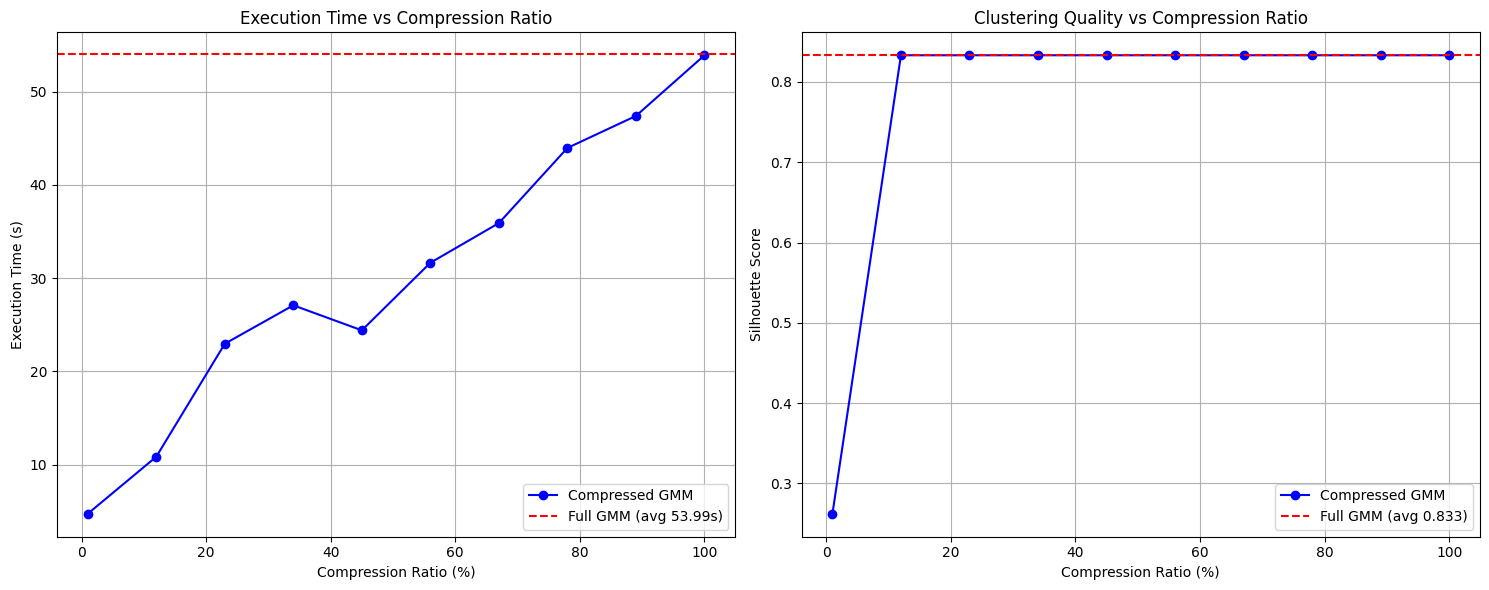

In [5]:
analyze_compression_ratio()

In [6]:
def analyze_dimensions():
    print("\nAnalyzing the effect of dimensions...")
    # Fixed parameters
    n_samples = 10000
    n_clusters = 3
    compression_ratio = 0.1
    dimensions = np.logspace(2, 3, 10).astype(int)  # 100 to 1000 dimensions
    
    # Store results
    results = {
        'time_compressed': [],
        'time_full': [],
        'silhouette_compressed': [],
        'silhouette_full': []
    }
    
    # Test each dimension
    for dim in dimensions:
        print(f"\nDimensions: {dim}")
        
        # Generate data
        X, true_labels = make_blobs(n_samples=n_samples, n_features=dim,
                                  centers=n_clusters, random_state=7404)
        
        # Full GMM
        start_time = time.time()
        full_gmm = GaussianMixturePy(
            n_components=n_clusters,
            num_samp=n_samples,
            num_feat_full=dim,
            num_feat_comp=dim,  # uncompressed
            random_state=7404
        )
        full_gmm.fit(X)
        full_time = time.time() - start_time
        full_labels = full_gmm.predict(X)
        full_silhouette = silhouette_score(X, full_labels)
        
        # Compressed GMM
        start_time = time.time()
        num_feat_comp = int(dim * compression_ratio)
        compressed_gmm = GaussianMixturePy(
            n_components=n_clusters,
            num_samp=n_samples,
            num_feat_full=dim,
            num_feat_comp=num_feat_comp,
            random_state=7404
        )
        compressed_gmm.fit(X)
        compressed_time = time.time() - start_time
        compressed_labels = compressed_gmm.predict(X)
        compressed_silhouette = silhouette_score(X, compressed_labels)
        
        # Store results
        results['time_compressed'].append(compressed_time)
        results['time_full'].append(full_time)
        results['silhouette_compressed'].append(compressed_silhouette)
        results['silhouette_full'].append(full_silhouette)
        
        print(f'Full GMM - Time: {full_time:.2f}s, Silhouette: {full_silhouette:.3f}')
        print(f'Compressed GMM - Time: {compressed_time:.2f}s, Silhouette: {compressed_silhouette:.3f}')
    
    # Visualize results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot execution time
    ax1.plot(dimensions, results['time_compressed'], 'bo-', label='Compressed GMM')
    ax1.plot(dimensions, results['time_full'], 'ro-', label='Full GMM')
    ax1.set_xlabel('Dimensions')
    ax1.set_ylabel('Execution Time (s)')
    ax1.set_title(f'Execution Time vs Dimensions\n(Compression Ratio: {compression_ratio*100:.0f}%)')
    ax1.grid(True)
    ax1.legend()
    ax1.set_xscale('log')
    
    # Plot silhouette scores
    ax2.plot(dimensions, results['silhouette_compressed'], 'bo-', label='Compressed GMM')
    ax2.plot(dimensions, results['silhouette_full'], 'ro-', label='Full GMM')
    ax2.set_xlabel('Dimensions')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title(f'Clustering Quality vs Dimensions\n(Compression Ratio: {compression_ratio*100:.0f}%)')
    ax2.grid(True)
    ax2.legend()
    ax2.set_xscale('log')
    
    plt.tight_layout()
    plt.show()


Analyzing the effect of dimensions...

Dimensions: 100
Full GMM - Time: 10.35s, Silhouette: 0.832
Compressed GMM - Time: 5.24s, Silhouette: 0.832

Dimensions: 129
Full GMM - Time: 13.26s, Silhouette: 0.824
Compressed GMM - Time: 3.48s, Silhouette: 0.824

Dimensions: 166
Full GMM - Time: 16.97s, Silhouette: 0.821
Compressed GMM - Time: 4.44s, Silhouette: 0.821

Dimensions: 215
Full GMM - Time: 22.10s, Silhouette: 0.830
Compressed GMM - Time: 5.38s, Silhouette: 0.830

Dimensions: 278
Full GMM - Time: 30.25s, Silhouette: 0.830
Compressed GMM - Time: 7.58s, Silhouette: 0.830

Dimensions: 359
Full GMM - Time: 37.41s, Silhouette: 0.829
Compressed GMM - Time: 6.60s, Silhouette: 0.829

Dimensions: 464
Full GMM - Time: 48.65s, Silhouette: 0.829
Compressed GMM - Time: 9.76s, Silhouette: 0.829

Dimensions: 599
Full GMM - Time: 64.03s, Silhouette: 0.828
Compressed GMM - Time: 12.53s, Silhouette: 0.828

Dimensions: 774
Full GMM - Time: 83.21s, Silhouette: 0.828
Compressed GMM - Time: 13.67s, Silho

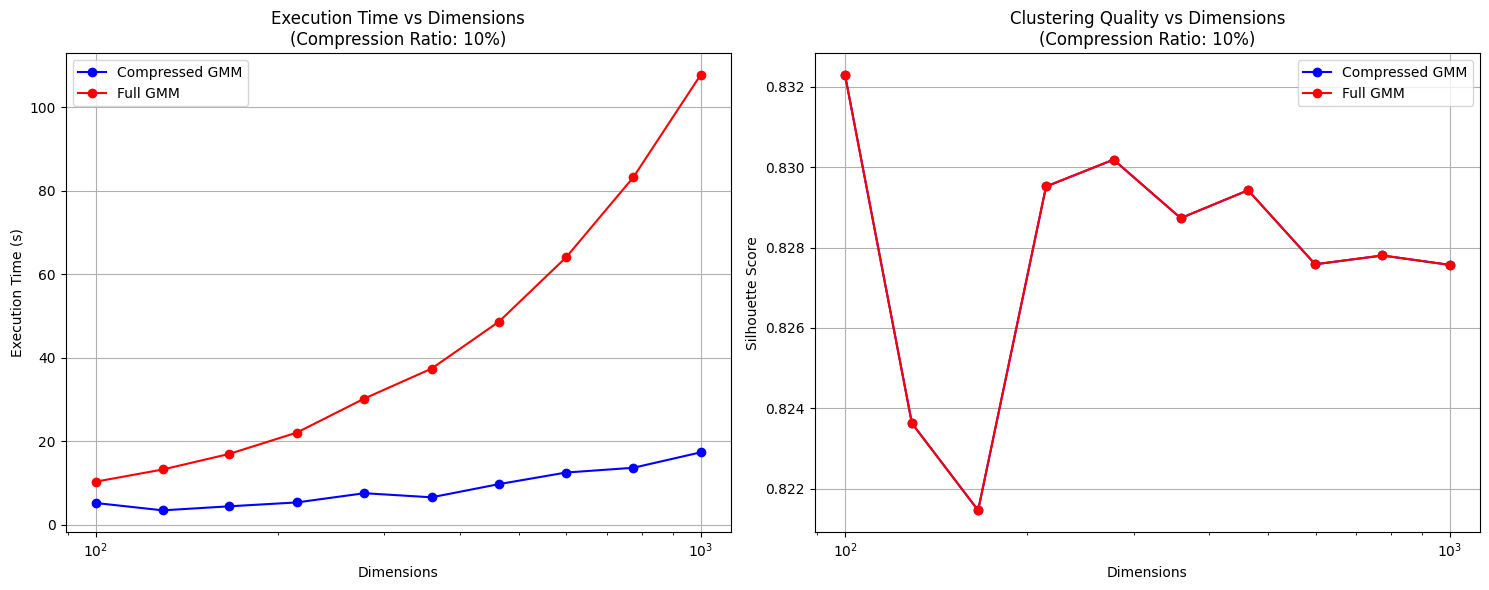

In [7]:
analyze_dimensions()

In [8]:
def analyze_sample_size():
    print("\nAnalyzing the effect of sample size...")
    # Fixed parameters
    n_features = 512
    n_clusters = 3
    compression_ratio = 0.1
    sample_sizes = np.logspace(3, 4, 10).astype(int)  # 1000 to 10000 samples
    
    # Store results
    results = {
        'time_compressed': [],
        'time_full': [],
        'silhouette_compressed': [],
        'silhouette_full': []
    }
    
    # Test each sample size
    for n_samples in sample_sizes:
        print(f"\nSample Size: {n_samples}")
        
        # Generate data
        X, true_labels = make_blobs(n_samples=n_samples, n_features=n_features,
                                  centers=n_clusters, random_state=42)
        
        # Full GMM
        start_time = time.time()
        full_gmm = GaussianMixturePy(
            n_components=n_clusters,
            num_samp=n_samples,
            num_feat_full=n_features,
            num_feat_comp=n_features,  # uncompressed
            random_state=42
        )
        full_gmm.fit(X)
        full_time = time.time() - start_time
        full_labels = full_gmm.predict(X)
        full_silhouette = silhouette_score(X, full_labels)
        
        # Compressed GMM
        start_time = time.time()
        num_feat_comp = int(n_features * compression_ratio)
        compressed_gmm = GaussianMixturePy(
            n_components=n_clusters,
            num_samp=n_samples,
            num_feat_full=n_features,
            num_feat_comp=num_feat_comp,
            random_state=42
        )
        compressed_gmm.fit(X)
        compressed_time = time.time() - start_time
        compressed_labels = compressed_gmm.predict(X)
        compressed_silhouette = silhouette_score(X, compressed_labels)
        
        # Store results
        results['time_compressed'].append(compressed_time)
        results['time_full'].append(full_time)
        results['silhouette_compressed'].append(compressed_silhouette)
        results['silhouette_full'].append(full_silhouette)
        
        print(f'Full GMM - Time: {full_time:.2f}s, Silhouette: {full_silhouette:.3f}')
        print(f'Compressed GMM - Time: {compressed_time:.2f}s, Silhouette: {compressed_silhouette:.3f}')
    
    # Visualize results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot execution time
    ax1.plot(sample_sizes, results['time_compressed'], 'bo-', label='Compressed GMM')
    ax1.plot(sample_sizes, results['time_full'], 'ro-', label='Full GMM')
    ax1.set_xlabel('Sample Size')
    ax1.set_ylabel('Execution Time (s)')
    ax1.set_title(f'Execution Time vs Sample Size\n(Compression Ratio: {compression_ratio*100:.0f}%)')
    ax1.grid(True)
    ax1.legend()
    ax1.set_xscale('log')
    
    # Plot silhouette scores
    ax2.plot(sample_sizes, results['silhouette_compressed'], 'bo-', label='Compressed GMM')
    ax2.plot(sample_sizes, results['silhouette_full'], 'ro-', label='Full GMM')
    ax2.set_xlabel('Sample Size')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title(f'Clustering Quality vs Sample Size\n(Compression Ratio: {compression_ratio*100:.0f}%)')
    ax2.grid(True)
    ax2.legend()
    ax2.set_xscale('log')
    
    plt.tight_layout()
    plt.show()


Analyzing the effect of sample size...

Sample Size: 1000
Full GMM - Time: 5.56s, Silhouette: 0.833
Compressed GMM - Time: 1.38s, Silhouette: 0.833

Sample Size: 1291
Full GMM - Time: 7.05s, Silhouette: 0.833
Compressed GMM - Time: 1.23s, Silhouette: 0.833

Sample Size: 1668
Full GMM - Time: 8.91s, Silhouette: 0.833
Compressed GMM - Time: 1.52s, Silhouette: 0.833

Sample Size: 2154
Full GMM - Time: 11.49s, Silhouette: 0.833
Compressed GMM - Time: 2.07s, Silhouette: 0.833

Sample Size: 2782
Full GMM - Time: 14.83s, Silhouette: 0.833
Compressed GMM - Time: 2.96s, Silhouette: 0.174

Sample Size: 3593
Full GMM - Time: 20.42s, Silhouette: 0.833
Compressed GMM - Time: 3.31s, Silhouette: 0.833

Sample Size: 4641
Full GMM - Time: 24.89s, Silhouette: 0.833
Compressed GMM - Time: 4.28s, Silhouette: 0.181

Sample Size: 5994
Full GMM - Time: 32.28s, Silhouette: 0.833
Compressed GMM - Time: 6.52s, Silhouette: 0.833

Sample Size: 7742
Full GMM - Time: 41.65s, Silhouette: 0.833
Compressed GMM - Time

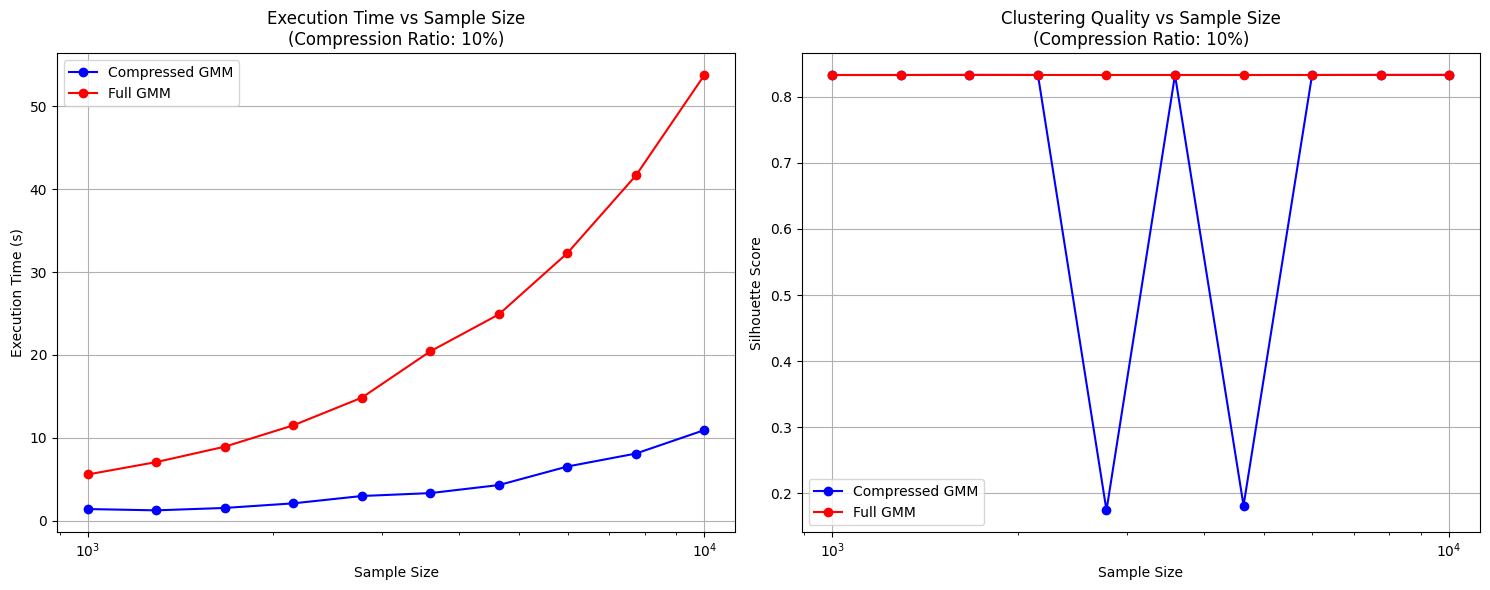

In [9]:
analyze_sample_size()